In [15]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from cvxopt import matrix, solvers 
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns= iris["feature_names"] + ["target"])
iris_df.head()
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

In [34]:
X = iris_df[["petal length (cm)", "petal width (cm)"]].to_numpy()
y = iris_df[["target"]].to_numpy()

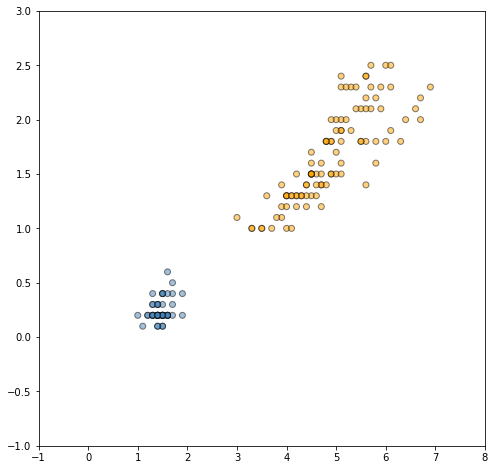

In [3]:
plt.figure(figsize=(8, 8))
colors = ["steelblue", "orange"]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(-1,8)
plt.ylim(-1,3)
plt.show()

In [4]:
n = X.shape[0]
H = np.dot(y*X, (y*X).T)

In [5]:
q = np.repeat([-1.0], n)[..., None]

In [6]:
A = y.reshape(1, -1)
b = 0.0

In [7]:
G = np.negative(np.eye(n))
h = np.zeros(n)

In [8]:
P = matrix(H)
q = matrix(q)
G = matrix(G)
h = matrix(h)
A = matrix(A)
b = matrix(b)

In [10]:
sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol["x"])

     pcost       dcost       gap    pres   dres
 0: -5.3976e+01 -1.0806e+02  4e+02  2e+01  2e+00
 1: -2.7252e+02 -2.7555e+02  2e+02  9e+00  1e+00
 2: -3.1032e+04 -3.1035e+04  2e+02  9e+00  1e+00
 3: -3.0762e+08 -3.0762e+08  5e+02  9e+00  1e+00
 4: -3.0454e+14 -3.0454e+14  3e+06  9e+00  1e+00
 5: -3.0150e+22 -3.0150e+22  3e+12  9e+05  1e+00
 6: -2.9848e+32 -2.9848e+32  3e+20  8e+15  1e+00
 7: -2.9549e+44 -2.9549e+44  3e+30  7e+00  1e+00
 8: -2.9460e+58 -2.9460e+58  3e+42  6e+41  1e+00
 9: -2.7768e+90 -2.7768e+90  3e+74  5e+73  6e-01
10: -1.3527e+106 -1.3527e+106  1e+88  4e-01  6e-01
11: -1.1114e+142 -1.1114e+142  1e+124 3e+125  6e-01
12: -1.0336e+178 -1.0336e+178  1e+160  5e-03  6e-01
13: -1.0336e+178 -1.0336e+178  1e+160    inf  6e-01
14: -1.0336e+178 -1.0336e+178  1e+160    inf  6e-01
15: -1.0336e+178 -1.0336e+178  1e+160    inf  6e-01
16: -1.0336e+178 -1.0336e+178  1e+160    inf  6e-01
17: -1.0336e+178 -1.0336e+178  1e+160    inf  6e-01
18: -1.0336e+178 -1.0336e+178  1e+160    inf  6

In [11]:
w = np.dot((y * alphas).T, X)[0]

In [12]:
S = (alphas > 1e-5).flatten()
b = np.mean(y[S] - np.dot(X[S], w.reshape(-1,1)))

In [13]:
print("W:", w)
print("b:", b)

W: [-0.0534272  -0.02815597]
b: 0.641588052473986


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [17]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)

/home/jay/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.80      0.89         5
         2.0       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



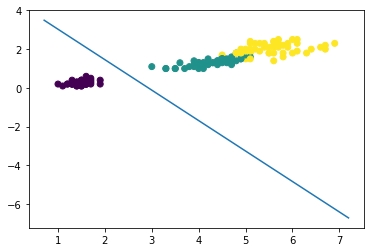

In [28]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
# plt.scatter(X_train[:,1],X_train[:,2],c=y_train)
ax = plt.gca()
xlim = ax.get_xlim()
ax.scatter(X_test[:,0],X_test[:,1],c=y_test)

w = classifier.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(xlim[0],xlim[1])
yy = a * xx - (classifier.intercept_[0] / w[1])

plt.plot(xx,yy)